In [1]:
import csv
import pickle
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2]:
df = pd.read_csv('../data/cleaned.csv')

In [3]:
df.head()

,Unnamed: 0,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,...,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,SalePrice,SalePrice_deskewed
0,0,109,533352170,60,RL,0.0,13517,Pave,None,IR1,...,0,None,None,None,0,3,2010,WD,130500,11.779136
1,1,544,531379050,60,RL,43.0,11492,Pave,None,IR1,...,0,None,None,None,0,4,2009,WD,220000,12.301387
2,2,153,535304180,20,RL,68.0,7922,Pave,None,Reg,...,0,None,None,None,0,1,2010,WD,109000,11.599112
3,3,318,916386060,60,RL,73.0,9802,Pave,None,Reg,...,0,None,None,None,0,4,2010,WD,174000,12.066816
4,4,255,906425045,50,RL,82.0,14235,Pave,None,IR1,...,0,None,None,None,0,3,2010,WD,138500,11.838633


In [4]:
saved_cols = df.drop(['SalePrice','Unnamed: 0', 'Id', 'PID'], 1).columns



In [5]:
models_df = pd.DataFrame(columns=['score','explained_variance','mean_absolute_error','mean_squared_error','median_absolute_error','r2'],
                         index=['Model_1_test','Model_2_test','Model_3_test','Model_4_test','Model_5_test'])

def all_the_metrics(model_name,score_1,y_t,y_p,score_2,y_t_test,y_p_test):
    models_df.loc[model_name,'score'] = score_1
    models_df.loc[model_name,'explained_variance'] = metrics.explained_variance_score(y_t,y_p)
    models_df.loc[model_name,'mean_absolute_error'] = metrics.mean_absolute_error(y_t,y_p)
    models_df.loc[model_name,'mean_squared_error'] = metrics.mean_squared_error(y_t,y_p)
    #models_df.loc[model_name,'mean_squared_log_error'] = metrics.mean_squared_log_error(y_t,y_p)
    models_df.loc[model_name,'median_absolute_error'] = metrics.median_absolute_error(y_t,y_p)
    models_df.loc[model_name,'r2'] = metrics.r2_score(y_t,y_p)
    models_df.loc[model_name+"_test",'score'] = score_2
    models_df.loc[model_name+"_test",'explained_variance'] = metrics.explained_variance_score(y_t_test,y_p_test)
    models_df.loc[model_name+"_test",'mean_absolute_error'] = metrics.mean_absolute_error(y_t_test,y_p_test)
    models_df.loc[model_name+"_test",'mean_squared_error'] = metrics.mean_squared_error(y_t_test,y_p_test)
    #models_df.loc[model_name+"_test",'mean_squared_log_error'] = metrics.mean_squared_log_error(y_t_test,y_p_test)
    models_df.loc[model_name+"_test",'median_absolute_error'] = metrics.median_absolute_error(y_t_test,y_p_test)
    models_df.loc[model_name+"_test",'r2'] = metrics.r2_score(y_t_test,y_p_test)
    #return models_df

### All Categorical Models

I first have to dummy them,then I'll go from there.

In [6]:
cat_features = ['MS_Zoning','Street','Alley','Lot_Shape','Land_Contour','Utilities','Lot_Config','Land_Slope','Neighborhood','Condition_1','Condition_2','Bldg_Type','House_Style','Roof_Style','Roof_Matl','Exterior_1st','Exterior_2nd','Mas_Vnr_Type','Exter_Qual','Exter_Cond','Foundation','Bsmt_Qual','Bsmt_Cond','Bsmt_Exposure','BsmtFin_Type_1','BsmtFin_Type_2','Heating','Heating_QC','Central_Air','Electrical','Kitchen_Qual','Functional','Fireplace_Qu','Garage_Type','Garage_Yr_Blt','Garage_Finish','Garage_Qual','Garage_Cond','Paved_Drive','Pool_QC','Fence','Misc_Feature','Sale_Type']
df = pd.get_dummies(df, columns=cat_features)

all_cat_features = ['MS_Zoning_A (agr)','MS_Zoning_C (all)','MS_Zoning_FV','MS_Zoning_I (all)','MS_Zoning_RH','MS_Zoning_RL','MS_Zoning_RM','Street_Grvl','Street_Pave','Alley_Grvl','Alley_None','Alley_Pave','Lot_Shape_IR1','Lot_Shape_IR2','Lot_Shape_IR3','Lot_Shape_Reg','Land_Contour_Bnk','Land_Contour_HLS','Land_Contour_Low','Land_Contour_Lvl','Utilities_AllPub','Utilities_NoSeWa','Utilities_NoSewr','Lot_Config_Corner','Lot_Config_CulDSac','Lot_Config_FR2','Lot_Config_FR3','Lot_Config_Inside','Land_Slope_Gtl','Land_Slope_Mod','Land_Slope_Sev','Neighborhood_Blmngtn','Neighborhood_Blueste','Neighborhood_BrDale','Neighborhood_BrkSide','Neighborhood_ClearCr','Neighborhood_CollgCr','Neighborhood_Crawfor','Neighborhood_Edwards','Neighborhood_Gilbert','Neighborhood_Greens','Neighborhood_GrnHill','Neighborhood_IDOTRR','Neighborhood_Landmrk','Neighborhood_MeadowV','Neighborhood_Mitchel','Neighborhood_NAmes','Neighborhood_NPkVill','Neighborhood_NWAmes','Neighborhood_NoRidge','Neighborhood_NridgHt','Neighborhood_OldTown','Neighborhood_SWISU','Neighborhood_Sawyer','Neighborhood_SawyerW','Neighborhood_Somerst','Neighborhood_StoneBr','Neighborhood_Timber','Neighborhood_Veenker','Condition_1_Artery','Condition_1_Feedr','Condition_1_Norm','Condition_1_PosA','Condition_1_PosN','Condition_1_RRAe','Condition_1_RRAn','Condition_1_RRNe','Condition_1_RRNn','Condition_2_Artery','Condition_2_Feedr','Condition_2_Norm','Condition_2_PosA','Condition_2_PosN','Condition_2_RRAe','Condition_2_RRAn','Condition_2_RRNn','Bldg_Type_1Fam','Bldg_Type_2fmCon','Bldg_Type_Duplex','Bldg_Type_Twnhs','Bldg_Type_TwnhsE','House_Style_1.5Fin','House_Style_1.5Unf','House_Style_1Story','House_Style_2.5Fin','House_Style_2.5Unf','House_Style_2Story','House_Style_SFoyer','House_Style_SLvl','Roof_Style_Flat','Roof_Style_Gable','Roof_Style_Gambrel','Roof_Style_Hip','Roof_Style_Mansard','Roof_Style_Shed','Roof_Matl_CompShg','Roof_Matl_Membran','Roof_Matl_Tar&Grv','Roof_Matl_WdShake','Roof_Matl_WdShngl','Exterior_1st_AsbShng','Exterior_1st_AsphShn','Exterior_1st_BrkComm','Exterior_1st_BrkFace','Exterior_1st_CBlock','Exterior_1st_CemntBd','Exterior_1st_HdBoard','Exterior_1st_ImStucc','Exterior_1st_MetalSd','Exterior_1st_Plywood','Exterior_1st_Stone','Exterior_1st_Stucco','Exterior_1st_VinylSd','Exterior_1st_Wd Sdng','Exterior_1st_WdShing','Exterior_2nd_AsbShng','Exterior_2nd_AsphShn','Exterior_2nd_Brk Cmn','Exterior_2nd_BrkFace','Exterior_2nd_CBlock','Exterior_2nd_CmentBd','Exterior_2nd_HdBoard','Exterior_2nd_ImStucc','Exterior_2nd_MetalSd','Exterior_2nd_Plywood','Exterior_2nd_Stone','Exterior_2nd_Stucco','Exterior_2nd_VinylSd','Exterior_2nd_Wd Sdng','Exterior_2nd_Wd Shng','Mas_Vnr_Type_BrkCmn','Mas_Vnr_Type_BrkFace','Mas_Vnr_Type_None','Mas_Vnr_Type_Stone','Exter_Qual_Ex','Exter_Qual_Fa','Exter_Qual_Gd','Exter_Qual_TA','Exter_Cond_Ex','Exter_Cond_Fa','Exter_Cond_Gd','Exter_Cond_Po','Exter_Cond_TA','Foundation_BrkTil','Foundation_CBlock','Foundation_PConc','Foundation_Slab','Foundation_Stone','Foundation_Wood','Bsmt_Qual_Ex','Bsmt_Qual_Fa','Bsmt_Qual_Gd','Bsmt_Qual_None','Bsmt_Qual_Po','Bsmt_Qual_TA','Bsmt_Cond_Ex','Bsmt_Cond_Fa','Bsmt_Cond_Gd','Bsmt_Cond_None','Bsmt_Cond_Po','Bsmt_Cond_TA','Bsmt_Exposure_Av','Bsmt_Exposure_Gd','Bsmt_Exposure_Mn','Bsmt_Exposure_No','Bsmt_Exposure_None','BsmtFin_Type_1_ALQ','BsmtFin_Type_1_BLQ','BsmtFin_Type_1_GLQ','BsmtFin_Type_1_LwQ','BsmtFin_Type_1_None','BsmtFin_Type_1_Rec','BsmtFin_Type_1_Unf','BsmtFin_Type_2_ALQ','BsmtFin_Type_2_BLQ','BsmtFin_Type_2_GLQ','BsmtFin_Type_2_LwQ','BsmtFin_Type_2_None','BsmtFin_Type_2_Rec','BsmtFin_Type_2_Unf','Heating_GasA','Heating_GasW','Heating_Grav','Heating_OthW','Heating_Wall','Heating_QC_Ex','Heating_QC_Fa','Heating_QC_Gd','Heating_QC_Po','Heating_QC_TA','Central_Air_N','Central_Air_Y','Electrical_FuseA','Electrical_FuseF','Electrical_FuseP','Electrical_Mix','Electrical_SBrkr','Kitchen_Qual_Ex','Kitchen_Qual_Fa','Kitchen_Qual_Gd','Kitchen_Qual_TA','Functional_Maj1','Functional_Maj2','Functional_Min1','Functional_Min2','Functional_Mod','Functional_Sal','Functional_Sev','Functional_Typ','Fireplace_Qu_Ex','Fireplace_Qu_Fa','Fireplace_Qu_Gd','Fireplace_Qu_None','Fireplace_Qu_Po','Fireplace_Qu_TA','Garage_Type_2Types','Garage_Type_Attchd','Garage_Type_Basment','Garage_Type_BuiltIn','Garage_Type_CarPort','Garage_Type_Detchd','Garage_Type_None','Garage_Yr_Blt_1895.0','Garage_Yr_Blt_1896.0','Garage_Yr_Blt_1900.0','Garage_Yr_Blt_1910.0','Garage_Yr_Blt_1914.0','Garage_Yr_Blt_1915.0','Garage_Yr_Blt_1916.0','Garage_Yr_Blt_1917.0','Garage_Yr_Blt_1918.0','Garage_Yr_Blt_1919.0','Garage_Yr_Blt_1920.0','Garage_Yr_Blt_1921.0','Garage_Yr_Blt_1922.0','Garage_Yr_Blt_1923.0','Garage_Yr_Blt_1924.0','Garage_Yr_Blt_1925.0','Garage_Yr_Blt_1926.0','Garage_Yr_Blt_1927.0','Garage_Yr_Blt_1928.0','Garage_Yr_Blt_1929.0','Garage_Yr_Blt_1930.0','Garage_Yr_Blt_1931.0','Garage_Yr_Blt_1932.0','Garage_Yr_Blt_1933.0','Garage_Yr_Blt_1934.0','Garage_Yr_Blt_1935.0','Garage_Yr_Blt_1936.0','Garage_Yr_Blt_1937.0','Garage_Yr_Blt_1938.0','Garage_Yr_Blt_1939.0','Garage_Yr_Blt_1940.0','Garage_Yr_Blt_1941.0','Garage_Yr_Blt_1942.0','Garage_Yr_Blt_1945.0','Garage_Yr_Blt_1946.0','Garage_Yr_Blt_1947.0','Garage_Yr_Blt_1948.0','Garage_Yr_Blt_1949.0','Garage_Yr_Blt_1950.0','Garage_Yr_Blt_1951.0','Garage_Yr_Blt_1952.0','Garage_Yr_Blt_1953.0','Garage_Yr_Blt_1954.0','Garage_Yr_Blt_1955.0','Garage_Yr_Blt_1956.0','Garage_Yr_Blt_1957.0','Garage_Yr_Blt_1958.0','Garage_Yr_Blt_1959.0','Garage_Yr_Blt_1960.0','Garage_Yr_Blt_1961.0','Garage_Yr_Blt_1962.0','Garage_Yr_Blt_1963.0','Garage_Yr_Blt_1964.0','Garage_Yr_Blt_1965.0','Garage_Yr_Blt_1966.0','Garage_Yr_Blt_1967.0','Garage_Yr_Blt_1968.0','Garage_Yr_Blt_1969.0','Garage_Yr_Blt_1970.0','Garage_Yr_Blt_1971.0','Garage_Yr_Blt_1972.0','Garage_Yr_Blt_1973.0','Garage_Yr_Blt_1974.0','Garage_Yr_Blt_1975.0','Garage_Yr_Blt_1976.0','Garage_Yr_Blt_1977.0','Garage_Yr_Blt_1978.0','Garage_Yr_Blt_1979.0','Garage_Yr_Blt_1980.0','Garage_Yr_Blt_1981.0','Garage_Yr_Blt_1982.0','Garage_Yr_Blt_1983.0','Garage_Yr_Blt_1984.0','Garage_Yr_Blt_1985.0','Garage_Yr_Blt_1986.0','Garage_Yr_Blt_1987.0','Garage_Yr_Blt_1988.0','Garage_Yr_Blt_1989.0','Garage_Yr_Blt_1990.0','Garage_Yr_Blt_1991.0','Garage_Yr_Blt_1992.0','Garage_Yr_Blt_1993.0','Garage_Yr_Blt_1994.0','Garage_Yr_Blt_1995.0','Garage_Yr_Blt_1996.0','Garage_Yr_Blt_1997.0','Garage_Yr_Blt_1998.0','Garage_Yr_Blt_1999.0','Garage_Yr_Blt_2000.0','Garage_Yr_Blt_2001.0','Garage_Yr_Blt_2002.0','Garage_Yr_Blt_2003.0','Garage_Yr_Blt_2004.0','Garage_Yr_Blt_2005.0','Garage_Yr_Blt_2006.0','Garage_Yr_Blt_2007.0','Garage_Yr_Blt_2008.0','Garage_Yr_Blt_2009.0','Garage_Yr_Blt_2010.0','Garage_Yr_Blt_2207.0','Garage_Yr_Blt_None','Garage_Finish_Fin','Garage_Finish_None','Garage_Finish_RFn','Garage_Finish_Unf','Garage_Qual_Ex','Garage_Qual_Fa','Garage_Qual_Gd','Garage_Qual_None','Garage_Qual_Po','Garage_Qual_TA','Garage_Cond_Ex','Garage_Cond_Fa','Garage_Cond_Gd','Garage_Cond_None','Garage_Cond_Po','Garage_Cond_TA','Paved_Drive_N','Paved_Drive_P','Paved_Drive_Y','Pool_QC_Ex','Pool_QC_Fa','Pool_QC_Gd','Pool_QC_None','Pool_QC_TA','Fence_GdPrv','Fence_GdWo','Fence_MnPrv','Fence_MnWw','Fence_None','Misc_Feature_Gar2','Misc_Feature_None','Misc_Feature_Othr','Misc_Feature_Shed','Misc_Feature_TenC','Sale_Type_COD','Sale_Type_CWD','Sale_Type_Con','Sale_Type_ConLD','Sale_Type_ConLI','Sale_Type_ConLw','Sale_Type_New','Sale_Type_Oth','Sale_Type_WD']

all_cols = df.drop(['SalePrice','SalePrice_deskewed','Unnamed: 0', 'Id', 'PID'], 1).columns

In [7]:
len(all_cols)

394

I'll start by using all the columns I have.

In [8]:
lr = LinearRegression()

X = df[all_cols]
y = df['SalePrice_deskewed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

ss = StandardScaler()

X_train_ss = ss.fit_transform(X_train,y_train)
X_test_ss = ss.transform(X_test)

In [9]:
type(X_train_ss)

numpy.ndarray

In [10]:
with open('../assets/X_train_ss.pkl', 'wb+') as f:
    pickle.dump(X_train_ss, f)

with open('../assets/columns.pkl', 'wb+') as f:
    pickle.dump(list(X.columns), f)

# with open('../data/X_train_ss.csv', 'w+') as f:
#     csv_writer = csv.writer(f)
#     csv_writer.writerows(X_train_ss)

with open('../data/X_test_ss.csv', 'w+') as f:
    csv_writer = csv.writer(f)
    csv_writer.writerows(X_test_ss)

y_train.to_csv('../data/ytrain.csv', index=False, header=False)

y_test.to_csv('../data/ytest.csv', index=False, header=False)

with open('../assets/scaler.pkl', 'wb+') as f:
    pickle.dump(ss, f)

In [11]:
X.columns

Index(['MS_SubClass', 'Lot_Frontage', 'Lot_Area', 'Overall_Qual',
       'Overall_Cond', 'Year_Built', 'Year_Remod/Add', 'Mas_Vnr_Area',
       'Total_Bsmt_SF', 'Gr_Liv_Area',
       ...
       'Misc_Feature_TenC', 'Sale_Type_COD', 'Sale_Type_CWD', 'Sale_Type_Con',
       'Sale_Type_ConLD', 'Sale_Type_ConLI', 'Sale_Type_ConLw',
       'Sale_Type_New', 'Sale_Type_Oth', 'Sale_Type_WD '],
      dtype='object', length=394)

#### Model 1 - Using all numeric columns

In [12]:
lr.fit(X_train_ss,y_train)
all_the_metrics("Model_1",lr.score(X_train_ss,y_train),y_train,lr.predict(X_train_ss),lr.score(X_test_ss,y_test),y_test,lr.predict(X_test_ss))

#### Model 2 - SelectKBest = 300

In [13]:
kb = SelectKBest(score_func=f_regression, k=300)
X_train_kb = kb.fit_transform(X_train_ss,y_train)
X_test_kb = kb.transform(X_test_ss)

lr.fit(X_train_kb,y_train)
all_the_metrics("Model_2",lr.score(X_train_kb,y_train),y_train,lr.predict(X_train_kb),lr.score(X_test_kb,y_test),y_test,lr.predict(X_test_kb))

C:\Users\mayet\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\mayet\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\mayet\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\mayet\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


### It really seems like having more numeric columns helps. Let's try other feature selection types.

Let's look into adjusting the weight of our coefficients.

#### Model 3 - ElasticNet l1 = .25

In [14]:
elnet = ElasticNetCV(cv=5,random_state=42,l1_ratio=.75)
elnet.fit(X_train_ss,y_train)

all_the_metrics("Model_3",elnet.score(X_train_ss,y_train),y_train,elnet.predict(X_train_ss),elnet.score(X_test_ss,y_test),y_test,elnet.predict(X_test_ss))

#### Model 4 -  ElasticNet l1 = 1

In [15]:
elnet1 = ElasticNetCV(cv=5,random_state=42,l1_ratio=1)
elnet1.fit(X_train_ss,y_train)

all_the_metrics("Model_4",elnet1.score(X_train_ss,y_train),y_train,elnet1.predict(X_train_ss),elnet1.score(X_test_ss,y_test),y_test,elnet1.predict(X_test_ss))

In [16]:
with open('../assets/elnet_cv5_l1.pkl', 'wb+') as f:
    pickle.dump(elnet1, f)

#### Model 5 -  ElasticNet l1 = 1, CV=15

In [17]:
elnet2 = ElasticNetCV(cv=30,random_state=42,l1_ratio=1)
elnet2.fit(X_train_ss,y_train)

all_the_metrics("Model_5",elnet2.score(X_train_ss,y_train),y_train,elnet2.predict(X_train_ss),elnet2.score(X_test_ss,y_test),y_test,elnet2.predict(X_test_ss))

In [18]:
with open('../assets/elnet_cv20_l1.pkl', 'wb+') as f:
    pickle.dump(elnet2, f)

In [19]:
models_df.sort_values('r2',ascending=False)

,score,explained_variance,mean_absolute_error,mean_squared_error,median_absolute_error,r2
Model_1,0.956501,0.956502,0.0616698,0.00734216,0.0447806,0.956501
Model_2,0.950029,0.950029,0.066902,0.00843459,0.0502389,0.950029
Model_5,0.944797,0.944797,0.0694136,0.00931772,0.0526694,0.944797
Model_3,0.943921,0.943921,0.0699363,0.00946559,0.0524037,0.943921
Model_4,0.943921,0.943921,0.0699414,0.00946568,0.0521293,0.943921
Model_5_test,0.918371,0.918488,0.0798119,0.0123848,0.0631286,0.918371
Model_4_test,0.918262,0.918368,0.0799516,0.0124014,0.0636662,0.918262
Model_3_test,0.91811,0.918206,0.0800777,0.0124246,0.0636995,0.91811
Model_2_test,-2.79608e+23,-2.79604e+23,2.23012e+10,4.24226e+22,0.0623904,-2.79608e+23
Model_1_test,-2.46244e+24,-2.46213e+24,6.88035e+10,3.73606e+23,0.0635089,-2.46244e+24


In [20]:
models_df.sort_values('score',ascending=False)

,score,explained_variance,mean_absolute_error,mean_squared_error,median_absolute_error,r2
Model_1,0.956501,0.956502,0.0616698,0.00734216,0.0447806,0.956501
Model_2,0.950029,0.950029,0.066902,0.00843459,0.0502389,0.950029
Model_5,0.944797,0.944797,0.0694136,0.00931772,0.0526694,0.944797
Model_3,0.943921,0.943921,0.0699363,0.00946559,0.0524037,0.943921
Model_4,0.943921,0.943921,0.0699414,0.00946568,0.0521293,0.943921
Model_5_test,0.918371,0.918488,0.0798119,0.0123848,0.0631286,0.918371
Model_4_test,0.918262,0.918368,0.0799516,0.0124014,0.0636662,0.918262
Model_3_test,0.91811,0.918206,0.0800777,0.0124246,0.0636995,0.91811
Model_2_test,-2.79608e+23,-2.79604e+23,2.23012e+10,4.24226e+22,0.0623904,-2.79608e+23
Model_1_test,-2.46244e+24,-2.46213e+24,6.88035e+10,3.73606e+23,0.0635089,-2.46244e+24


### So here's what I'm seeing. On test data, only model 5 is doing well.

- Model_4_test: cv=5, l1=1 (Fully Lasso, many iterations)

### Moving forward.

I want to focus on Model 4. First I want to see which coefficients are strongest.

In [21]:
elnet_coefs = pd.DataFrame({'Var':all_cols,"Coef":elnet1.coef_})

In [28]:
elnet_coefs.sort_values("Coef")

,Var,Coef
29,MS_Zoning_C (all),-0.022296
200,BsmtFin_Type_1_Unf,-0.018687
34,MS_Zoning_RM,-0.016089
210,Heating_Grav,-0.014599
218,Central_Air_N,-0.012850
130,Exterior_1st_BrkComm,-0.010449
121,Roof_Style_Mansard,-0.009379
72,Neighborhood_MeadowV,-0.008054
240,Fireplace_Qu_None,-0.007901
107,Bldg_Type_Twnhs,-0.007650


In [32]:
a = elnet_coefs[(elnet_coefs['Coef'] > .002) | (elnet_coefs['Coef'] < -.002)]['Coef']
b = elnet_coefs[(elnet_coefs['Coef'] > .002) | (elnet_coefs['Coef'] < -.002)]['Var']
a.shape, b.shape

((64,), (64,))

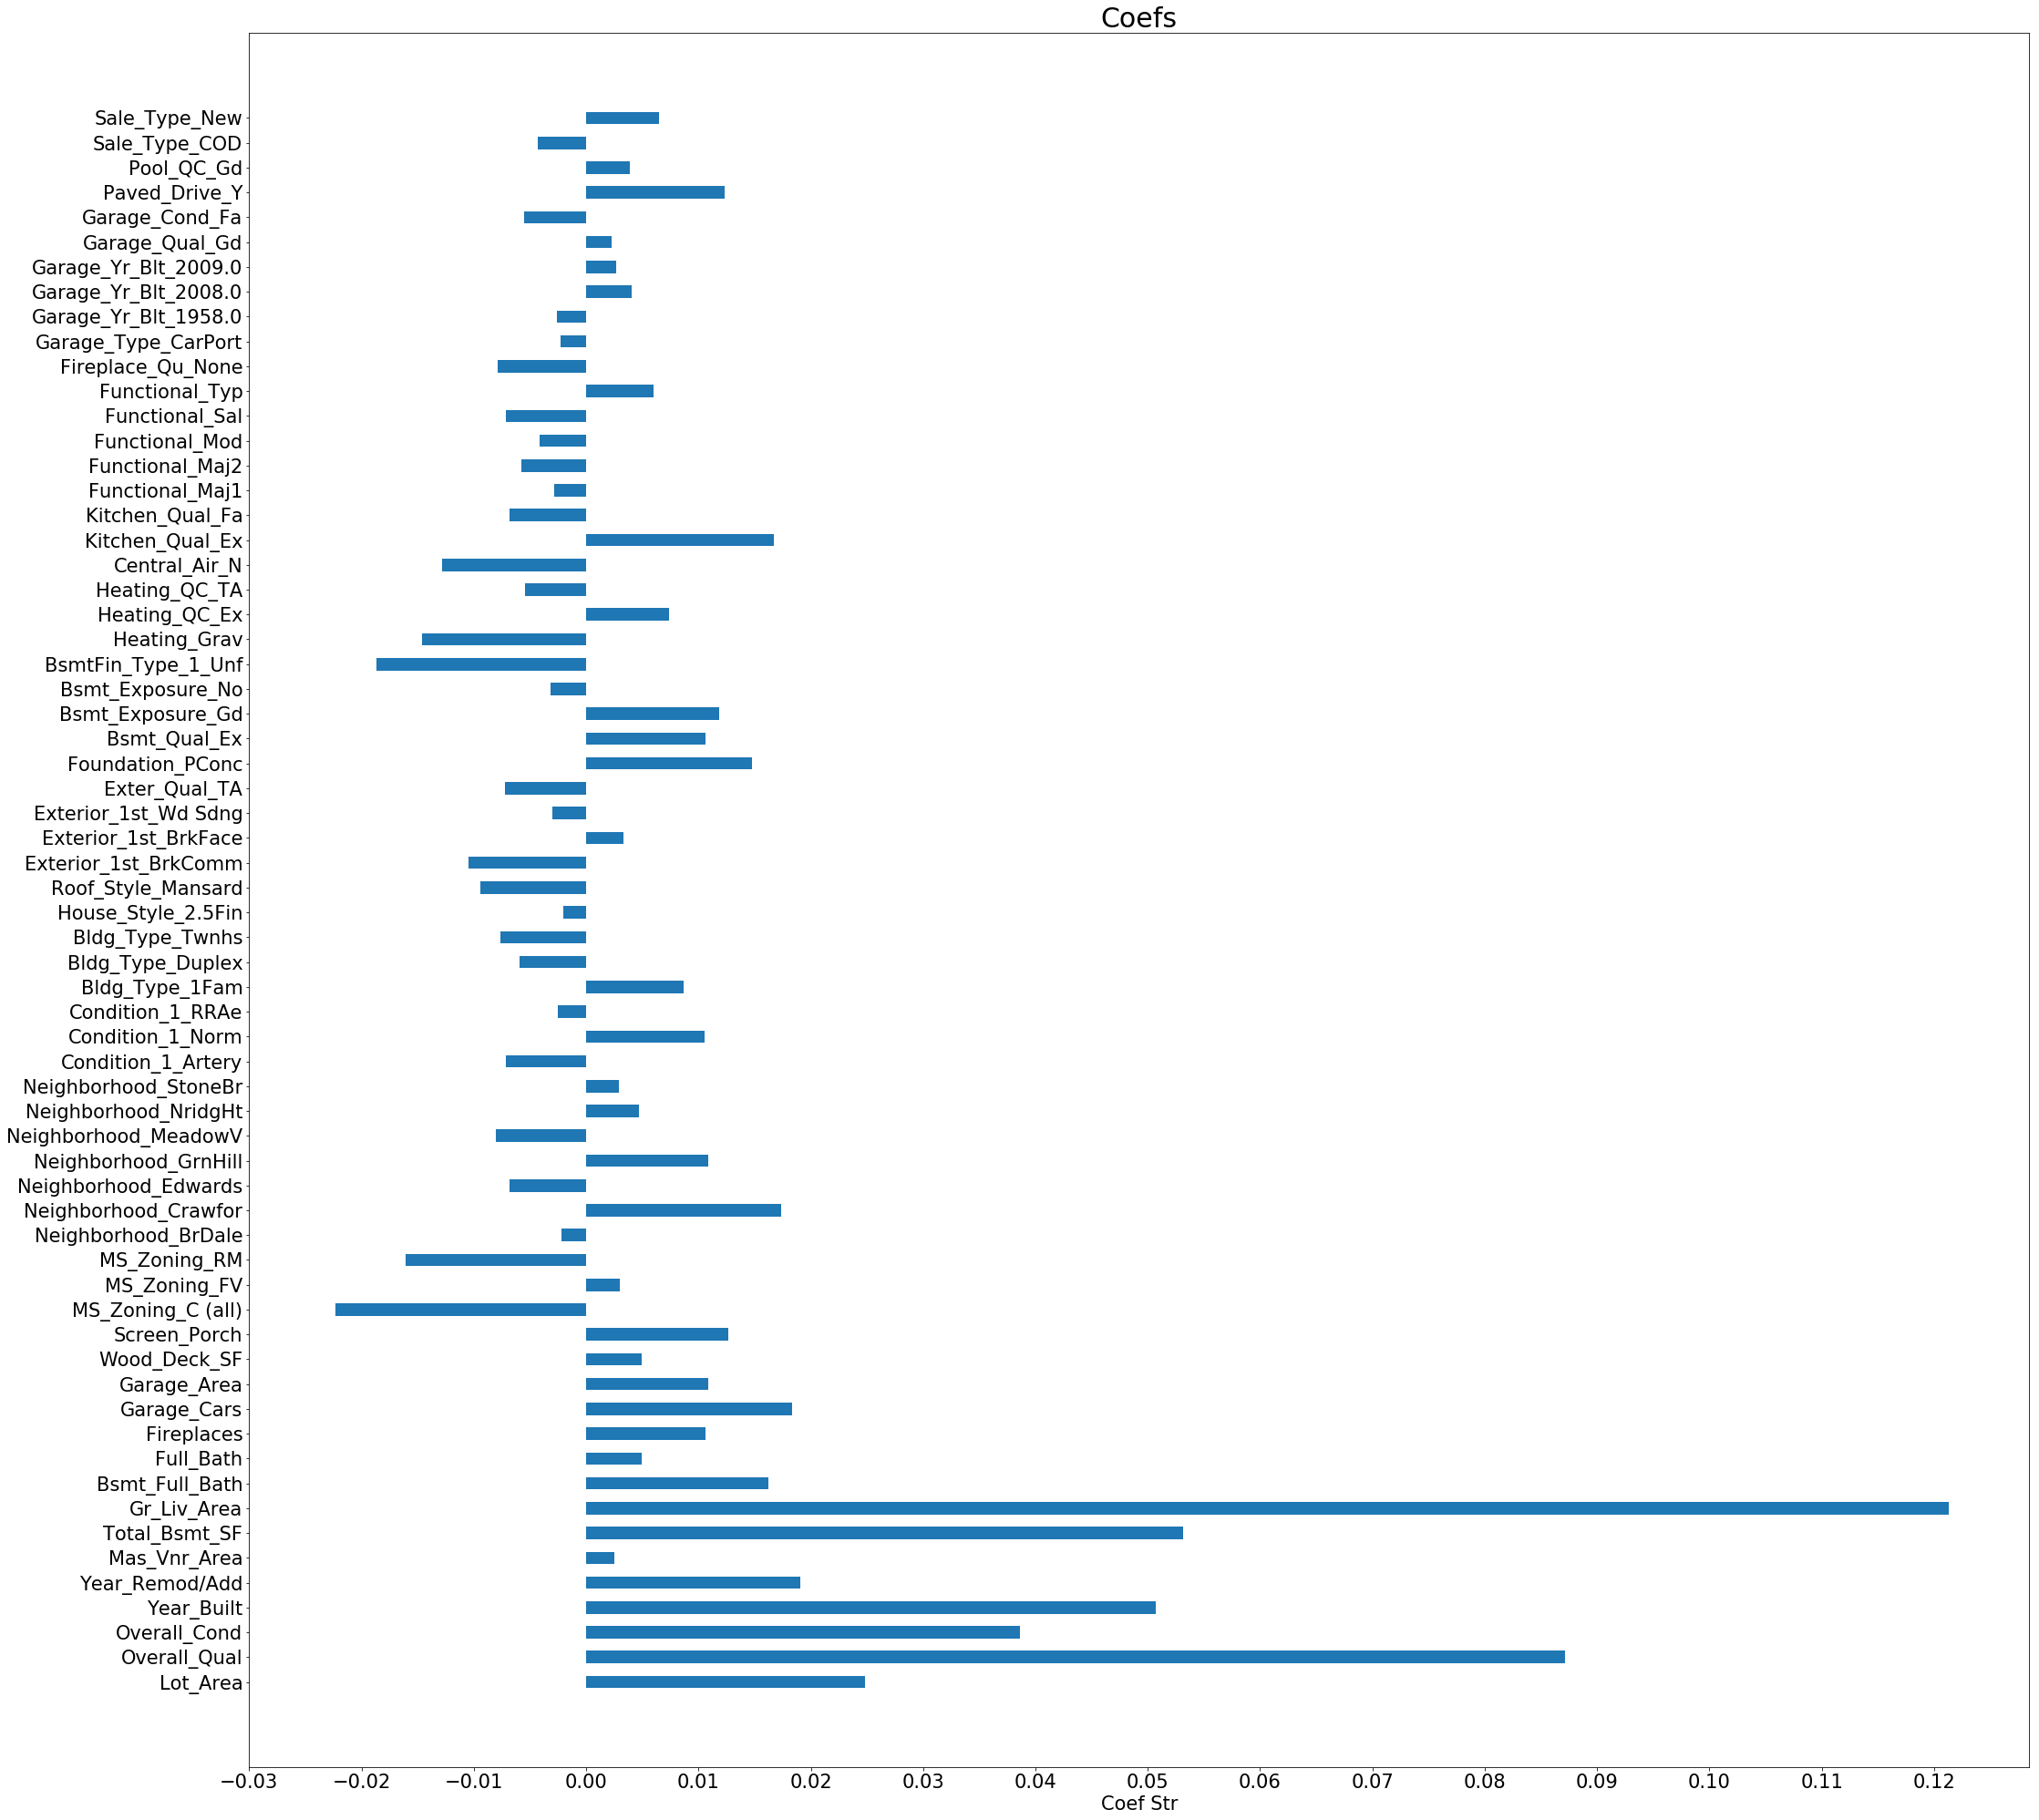

In [33]:
N = len(a)
ind = np.arange(N)
width= .5

plt.barh(ind, a, width)

plt.xlabel('Coef Str',fontsize=21)
plt.title('Coefs',fontsize=30)
plt.yticks(ind, b,fontsize=21)

plt.xticks(np.arange(-.03, .13, .01),fontsize=21)

a = plt.gcf()
a.set_size_inches(35, 35)

plt.show()

In [25]:
r_alphas = np.logspace(0, 50, 200)
elnet3 = ElasticNetCV(alphas=r_alphas, cv=5,random_state=42,l1_ratio=1)
elnet3.fit(X_train_ss,y_train)

all_the_metrics("Model_6",elnet3.score(X_train_ss,y_train),y_train,elnet3.predict(X_train_ss),elnet3.score(X_test_ss,y_test),y_test,elnet3.predict(X_test_ss))

In [26]:
models_df.sort_values('r2',ascending=False)

,score,explained_variance,mean_absolute_error,mean_squared_error,median_absolute_error,r2
Model_1,0.956501,0.956502,0.0616698,0.00734216,0.0447806,0.956501
Model_2,0.950029,0.950029,0.066902,0.00843459,0.0502389,0.950029
Model_5,0.944797,0.944797,0.0694136,0.00931772,0.0526694,0.944797
Model_3,0.943921,0.943921,0.0699363,0.00946559,0.0524037,0.943921
Model_4,0.943921,0.943921,0.0699414,0.00946568,0.0521293,0.943921
Model_5_test,0.918371,0.918488,0.0798119,0.0123848,0.0631286,0.918371
Model_4_test,0.918262,0.918368,0.0799516,0.0124014,0.0636662,0.918262
Model_3_test,0.91811,0.918206,0.0800777,0.0124246,0.0636995,0.91811
Model_6,0,-2.22045e-16,0.319459,0.16879,0.25694,0
Model_6_test,-0.000703593,0,0.300069,0.151829,0.241013,-0.000703593


In [27]:
models_df.sort_values('score',ascending=False)

,score,explained_variance,mean_absolute_error,mean_squared_error,median_absolute_error,r2
Model_1,0.956501,0.956502,0.0616698,0.00734216,0.0447806,0.956501
Model_2,0.950029,0.950029,0.066902,0.00843459,0.0502389,0.950029
Model_5,0.944797,0.944797,0.0694136,0.00931772,0.0526694,0.944797
Model_3,0.943921,0.943921,0.0699363,0.00946559,0.0524037,0.943921
Model_4,0.943921,0.943921,0.0699414,0.00946568,0.0521293,0.943921
Model_5_test,0.918371,0.918488,0.0798119,0.0123848,0.0631286,0.918371
Model_4_test,0.918262,0.918368,0.0799516,0.0124014,0.0636662,0.918262
Model_3_test,0.91811,0.918206,0.0800777,0.0124246,0.0636995,0.91811
Model_6,0,-2.22045e-16,0.319459,0.16879,0.25694,0
Model_6_test,-0.000703593,0,0.300069,0.151829,0.241013,-0.000703593
